   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

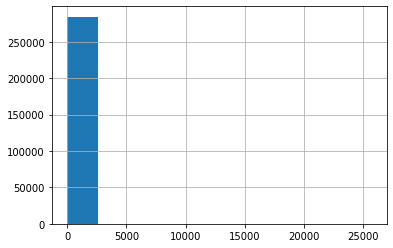

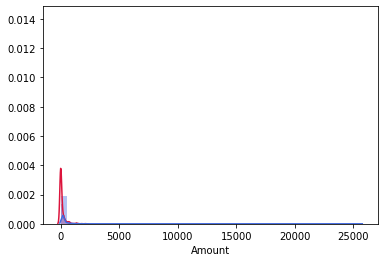

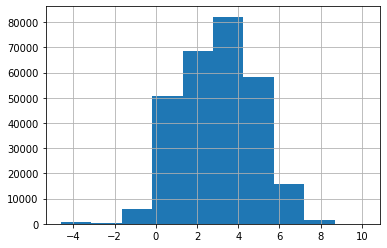

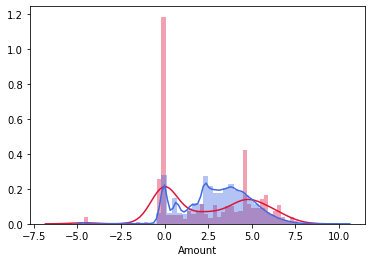

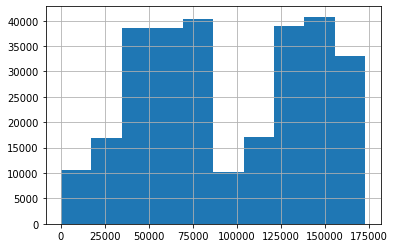

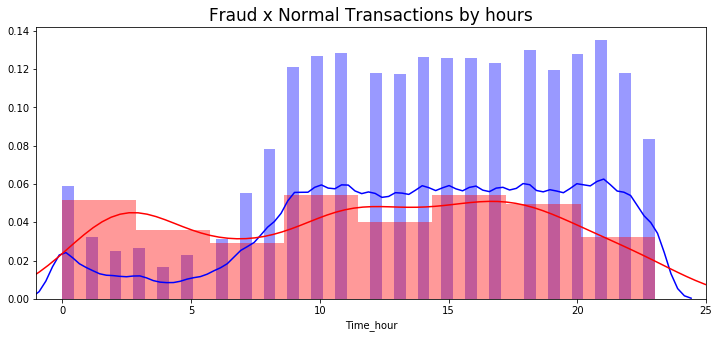

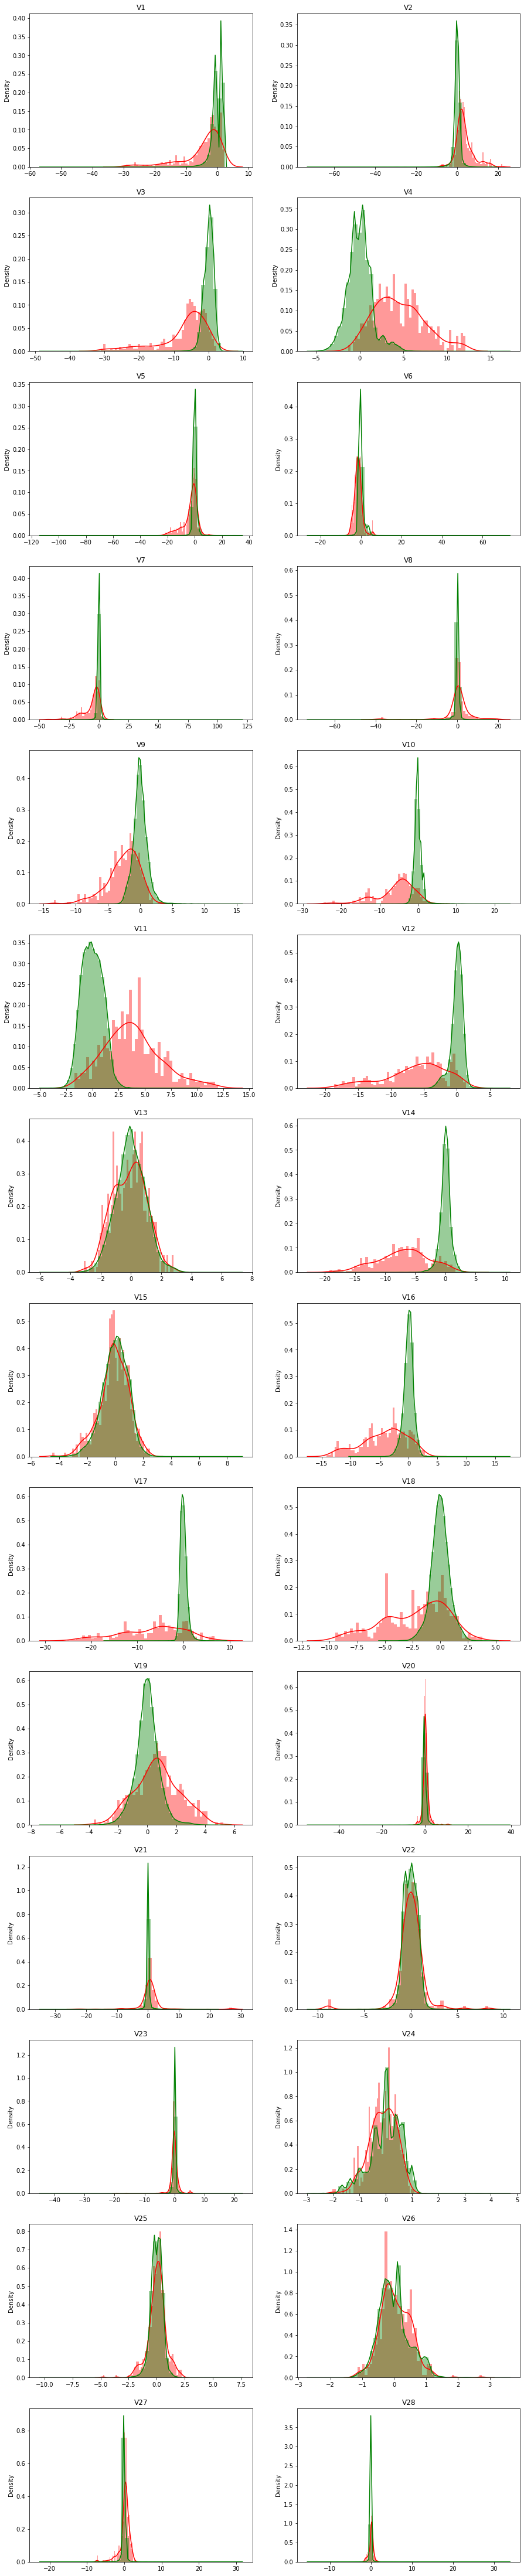

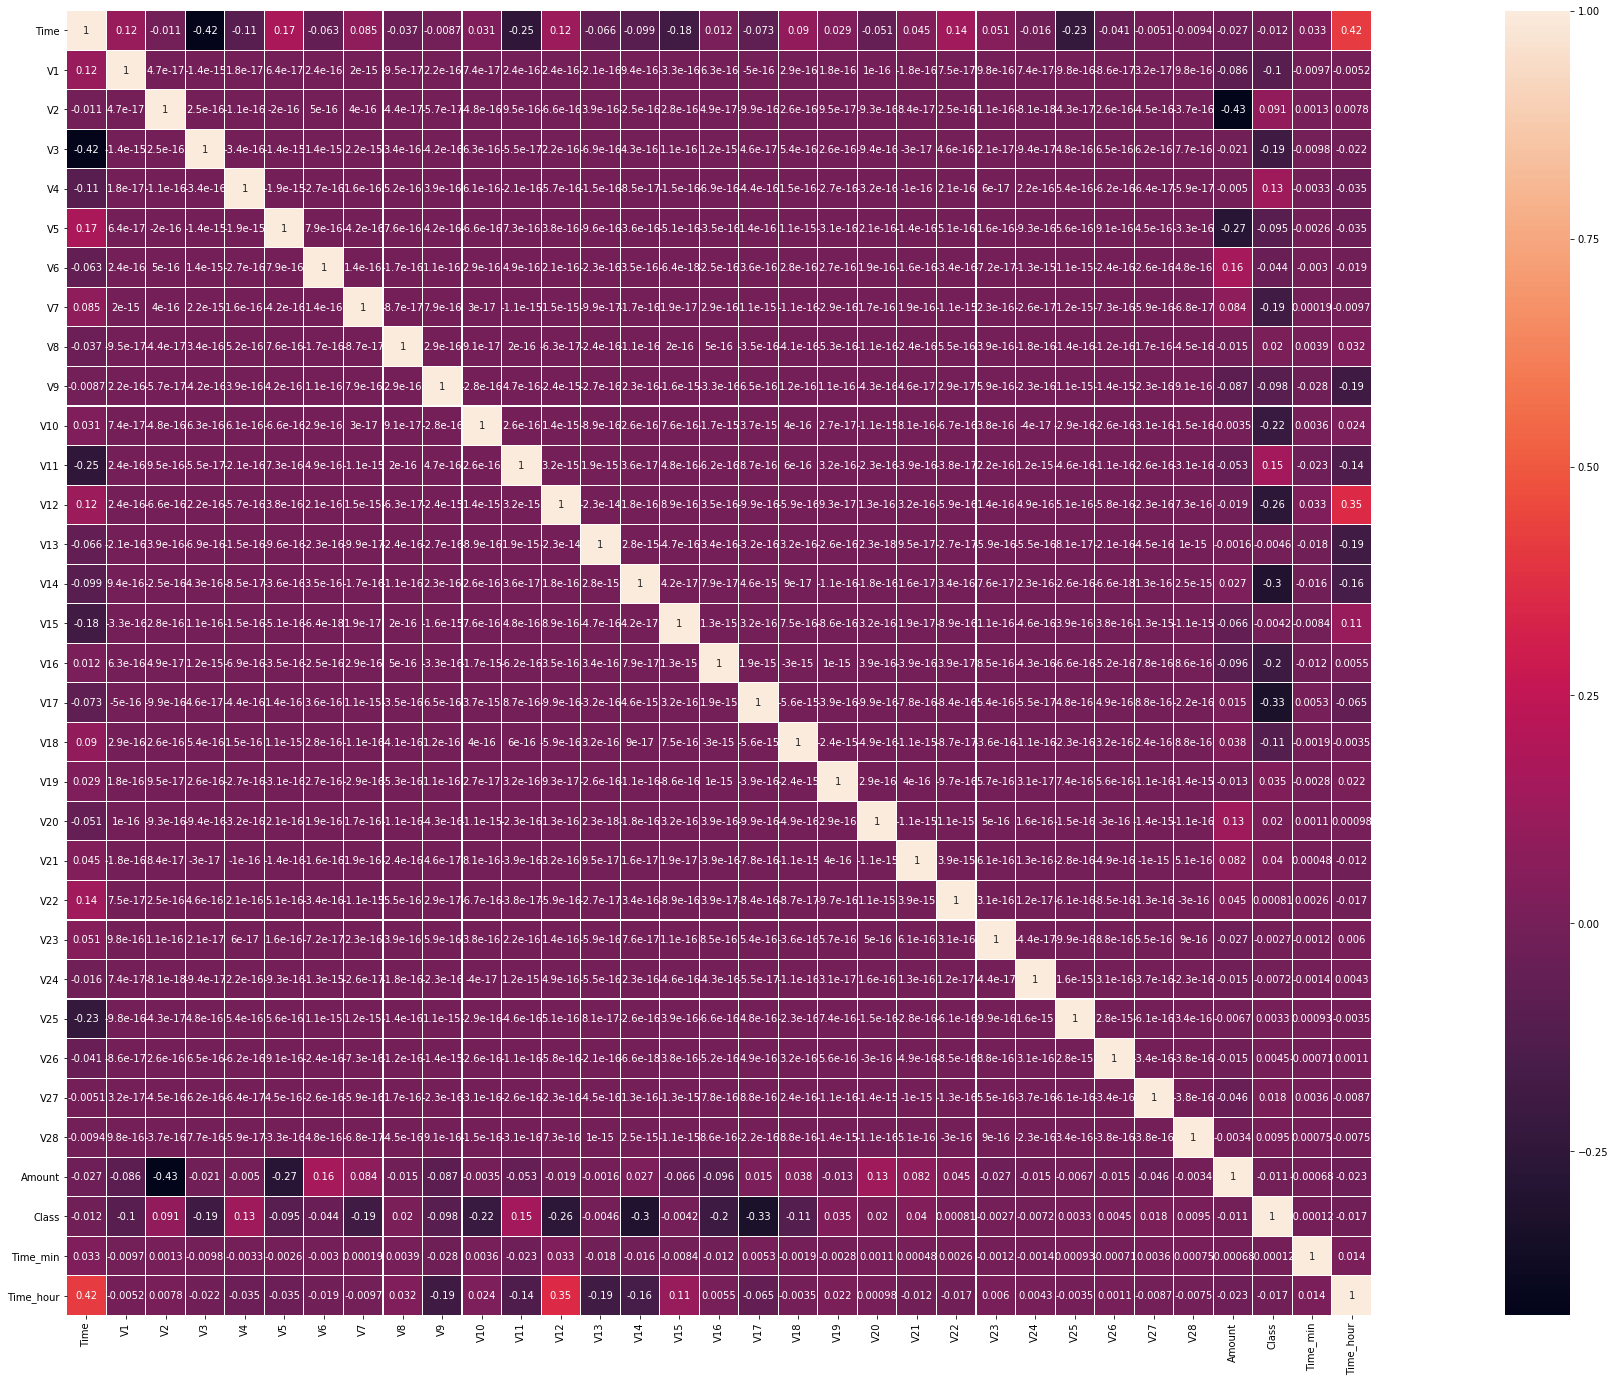

变量之间均比较相互独立，相关性不大，可不进行主成份分析和降维
0    284315
1       492
Name: Class, dtype: int64


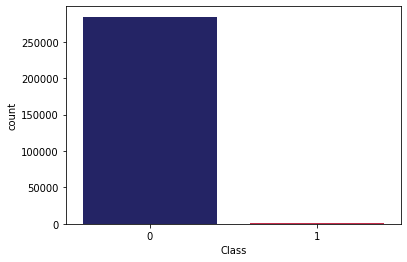

无欺诈行为样本占比：99.83%
有欺诈行为样本占比：0.17%
1    492
0    492
Name: Class, dtype: int64
       Time        V1        V2        V3        V4        V5        V6  \
0   39192.0  0.476531 -2.339009  0.676830 -0.178436 -1.734443  0.967706   
1  157284.0 -0.242245  4.147186 -5.672349  6.493741  1.591168 -1.602523   
2  144592.0 -0.574048 -0.154095  0.164580 -1.379336  0.097108  1.808210   
3   28242.0 -2.787248 -0.071340 -1.505288  3.361777 -3.357422  0.565835   
4   17187.0  1.088375  0.898474  0.394684  3.170258  0.175739 -0.221981   

         V7        V8        V9    ...           V23       V24       V25  \
0 -0.933268  0.295838  0.070783    ...     -0.575517 -0.187368  0.430993   
1 -0.950463  0.722903 -4.128505    ...     -0.286080 -1.153575 -0.035571   
2  1.177561  0.224144  1.088090    ...      0.408344 -0.690034 -1.727550   
3  0.303653  0.966914 -2.245882    ...      1.752227  0.219925  0.156282   
4 -0.022989 -0.010874  0.860044    ...      0.077614  0.167608  0.350182   

        V26    

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   41.6s
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:  1.2min finished


Done
{'colsample_bytree': 0.3, 'max_depth': 5, 'reg_alpha': 0.01, 'subsample': 0.6}


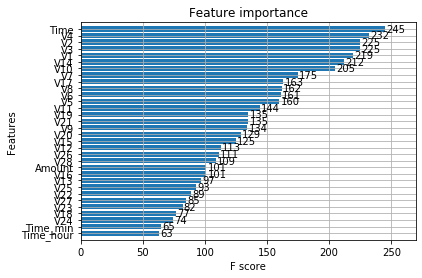

------------------------------------------------------------
xgboost模型训练结果：

On training datasets:

accuracy score is: 1.0
precision score is: 1.0
recall score is: 1.0
auc: 1.0
On training datasets:

accuracy score is: 0.9324324324324325
precision score is: 0.9797297297297297
recall score is: 0.8950617283950617
auc: 0.9363368343467846


In [2]:
# 加载模块
# 数据读取与计算
import numpy as np
import pandas as pd
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots
%matplotlib inline
# 模型数据预处理
from sklearn.preprocessing import StandardScaler
# 数据集划分与参数搜索
from sklearn.model_selection import StratifiedKFold, train_test_split,GridSearchCV
# 训练模型
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# 模型整合
from sklearn.pipeline import Pipeline
# 模型指标查看
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# 屏蔽warnings
import warnings
warnings.filterwarnings('ignore')

'''
1）探索数据
 要求：
  ① 读取数据表
  ② 查看数据的基本情况
'''
# 读取数据
df = pd.read_csv('D:\\0.工作\\数据分析\\考核项目09_信用卡交易欺诈风险预测\\考核项目09_信用卡交易欺诈风险预测\\creditcard.csv',engine='python',encoding='utf-8')
print(df.head())
# 查看数据维度和缺失情况
print(df.shape)
print(df.isna().sum())

'''
2）针对数据存在的问题，应该采取怎么样的特征工程？
 要求：
  ① 分别查看交易金额和交易时间，并对这两列特征进行处理
  ② 查看V1-V28这些特征与因变量标签之间的关系
  ③ 对数据进行共线性筛查
'''
#①查看金额
df['Amount'].hist()
plt.show()
plt.close()
# 金额特征存在明显的偏态分布
sns.distplot(df['Amount'][df['Class'] == 1], bins=50, color='#DC143C') #红色
sns.distplot(df['Amount'][df['Class'] == 0], bins=50, color='#4169E1') #蓝色
plt.show()
plt.close()

# 发现数据过于集中，无法区分正负类，取log进行纠偏
df['Amount'] = df['Amount'].map(lambda x: np.log(x) if x>0 else 0)
df['Amount'].hist()
plt.show()
plt.close()
# 分别查看纠偏后欺诈样本和非欺诈样本的金额数据分布
sns.distplot(df['Amount'][df['Class'] == 1], bins=50, color='#DC143C') #红色
sns.distplot(df['Amount'][df['Class'] == 0], bins=50, color='#4169E1') #蓝色
plt.show()
plt.close()

# ①查看时间
df['Time'].hist()
plt.show()
plt.close()

# 增加时间特征：小时，分钟
timedata = pd.to_timedelta(df['Time'],unit='s')
df['Time_min'] = (timedata.dt.components.minutes).astype(int)
df['Time_hour'] = (timedata.dt.components.hours).astype(int)
# 分别查看新增时间特征与是否有欺诈风险的关系，小时
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class']==0]['Time_hour'],color='b')
sns.distplot(df[df['Class']==1]['Time_hour'],color='r')
plt.title('Fraud x Normal Transactions by hours',fontsize=17)
plt.xlim([-1,25])
plt.show()
plt.close()

# ②查看所有其他主成份与是否欺诈风险的关系
columns = [f'V{i}' for i in range(1,29)]
grid = gridspec.GridSpec(14,2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][df['Class']==1], bins=50, color='r')
    sns.distplot(df[col][df['Class']==0], bins=50, color='g')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')

#③共线性筛查，查看所有特征的相关性
plt.figure(figsize=(48,24))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0,
           square=True, linecolor='white', annot=True)
plt.show()
plt.close()
print('变量之间均比较相互独立，相关性不大，可不进行主成份分析和降维')

'''
3）数据集是否存在分类不平衡的问题，如果存在应该如何解决？
 要求：
  ① 查看数据标签类别分布是否平衡
  ② 如果存在不平衡的问题，对样本进行重取样（建议采取随机欠取样的方法），获得平衡分类的数据
 随机欠取样:抽取所有的总量较少的类别，然后对总量较多的类别进行随机抽样，抽取和总量较少类别一样多的样本，构成采样均匀的数据集
'''
# ①查看数据是否存在分类不平衡的问题
class_freq = df['Class'].value_counts()
print(class_freq)

# 分布不均匀可视化
colors = ["#191970", "#DC143C"]
sns.countplot('Class', data=df, palette=colors)
plt.show()
plt.close()
print(f'无欺诈行为样本占比：{round((class_freq[0]/class_freq.sum())*100,2)}%')
print(f'有欺诈行为样本占比：{round((class_freq[1]/class_freq.sum())*100,2)}%')

# ②针对样本类别不平衡问题处理：随机欠采样。通过随机抽取与正样本数量一致的负样本，来解决样本中类别不平均的问题
# 打乱数据顺序
df_shuffle = df.copy().sample(frac=1).reset_index(drop=True)
# 抽取全部正样本
fraud_df = df_shuffle.loc[df_shuffle['Class'] == 1]
# 抽取等量的负样本
len1 = fraud_df.shape[0]
non_fraud_df = df_shuffle.loc[df_shuffle['Class'] == 0][:len1]
# 合并抽取的正负样本，重新打乱顺序
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
balanced_sample = normal_distributed_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_sample['Class'].value_counts())
print(balanced_sample.head())

'''
4）如何进行模型数据预处理？
 要求：
  ① 在平衡取样的数据集上对时间、金额特征进行标准化处理
'''
# 对未经标准化的时间和金额特征进行标准化处理
trans = StandardScaler()
balanced_sample[['Time','Amount','Time_min','Time_hour']] = trans.fit_transform(balanced_sample[['Time','Amount','Time_min','Time_hour']])
print(balanced_sample.head())

'''
5）选取不同的模型进行模型训练并对比模型效果、优化模型效果，确定最终预测模型
*要求：
  ① 使用留一法进行数据集划分，验证集比例：30%  
  ② 选取至少两个不同类型的分类算法进行欺诈风险预测模型训练，并对比模型效果（kaggle数据提供方推荐以AUC值来评价模型），在提交代码中用注释标明你选择的最佳模型
'''

#①模型数据划分, 使用留一法将平衡取样的建模数据集划分为训练集和验证集
# 提取自变量和应变量
x = balanced_sample.drop('Class',axis=1)
y = balanced_sample['Class']
# 使用留一法将数据集按照0.7比0.3 将数据集划分成训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)
print(f'the shape of x training set is: {X_train.shape}')
print(f'the shape of x testing set is: {X_test.shape}')

# 设置交叉验证
cv = StratifiedKFold(n_splits=3, shuffle=True)
#定义一个函数，方便我们查看模型在训练集和验证集上的各种指标
def check_performance(model, X_train, X_test, y_train, y_test):
    y_train_predict = model.predict(X_train)
    print(f'On training datasets:\n')
    print(f'accuracy score is: {accuracy_score(y_train,y_train_predict)}')
    print(f'precision score is: {precision_score(y_train, y_train_predict)}')
    print(f'recall score is: {recall_score(y_train, y_train_predict)}')
    print(f'auc: {roc_auc_score(y_train, y_train_predict)}')
    y_test_predict = model.predict(X_test)
    print(f'On training datasets:\n')
    print(f'accuracy score is: {accuracy_score(y_test,y_test_predict)}')
    print(f'precision score is: {precision_score(y_test,y_test_predict)}')
    print(f'recall score is: {recall_score(y_test,y_test_predict)}')
    print(f'auc: {roc_auc_score(y_test,y_test_predict)}')

# ②a、训练逻辑回归模型

# 设定搜索参数范围
log_params = {"penalty": ['l1','l2'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# 定义逻辑回归分类器
grid_log_clf = GridSearchCV(LogisticRegression(solver='liblinear'), log_params, cv=cv, n_jobs=16, scoring='roc_auc'
                           , verbose = 0, refit=True)
# 定义逻辑回归分类器
pipe_logclf = Pipeline([
    ('logistic_grid', grid_log_clf)
])
# 训练模型
pipe_logclf.fit(X_train, y_train)
print('done')
# 查看网络搜索出的最佳超参数
print(pipe_logclf.named_steps['logistic_grid'].best_params_)
# 查看逻辑回归模型的表现
print('--'*30)
print('逻辑回归训练结果：\n')
check_performance(pipe_logclf, X_train, X_test, y_train, y_test)

#②b、训练随机森林模型

# 定义随机模型
rf_model = RandomForestClassifier(criterion='gini',
                                  n_jobs = 16,
                                  n_estimators = 1000,
                                  random_state = 133)
# 定义需要搜索参数矩阵
parameters = {'max_features':['auto', 0.5, 0.8, 0.9],
              'max_depth': [3, 6, 9]}

# 定义参数搜索器
rf_grid_search = GridSearchCV(rf_model, parameters, n_jobs=16, cv=cv,scoring='roc_auc',
                             verbose=0, refit = True)
# 定义随机森林模型
pipe_rfclf = Pipeline([
    ('rf_grid', rf_grid_search)
])
# 训练模型
pipe_rfclf.fit(X_train, y_train)
print('Done')

# 查看模型搜索出的最佳参数
print(pipe_rfclf.named_steps['rf_grid'].best_params_)
# 查看随机森林模型的表现
print('--'*30)
print('随机森林模型训练结果：\n')
check_performance(pipe_rfclf, X_train, X_test, y_train, y_test)

#③ c、训练xgboost模型
# 定义xgboost 模型
xgb_model = xgb.XGBClassifier(objective = 'binary:hinge',
                             nthread = 8,
                             booster = 'gbtree',
                             n_estimators = 500,
                             learning_rate = 0.01)
# 定义模型的搜索参数
xgb_paras = {'max_depth': [3, 5],
            'subsample': [0.6, 0.9],
            'colsample_bytree': [0.3, 0.5, 0.6,0.8],
            'reg_alpha': [0.01, 0.05, 0.1, 1, 10]}
# 定义网络搜索器
xgb_grid_search = GridSearchCV(xgb_model, xgb_paras, n_jobs=8, cv=cv, scoring='roc_auc',
                              verbose=2, refit=True)
# 定义xgboost分类模型
pipe_xgbclf = Pipeline([
    ('xgb_clf', xgb_grid_search)
])
# 模型训练
pipe_xgbclf.fit(X_train, y_train)
print('Done')
# 查看模型搜索出的最佳参数
print(pipe_xgbclf.named_steps['xgb_clf'].best_params_)
xgb_final = pipe_xgbclf.named_steps['xgb_clf'].best_estimator_
xgb.plot_importance(xgb_final, max_num_features=40, height=0.8)
plt.show()
plt.close()

# 查看xgboost模型的表现
print('--'*30)
print('xgboost模型训练结果：\n')
check_performance(pipe_xgbclf, X_train, X_test, y_train, y_test)

print('从以上三个模型的训练和验证结果来看，xgboost模型的表现最好，因此选择xgboost模型，但同时也需要注意一下过拟合的问题')
